## The TetraBook and S3

A Jupyter Notebook for the School of Tomorrow.

With thanks to Alan Michelson on Synergeo, for circling back to it, and to David Koski, for the TetraBook meme in the first place.

[View in nbviewer]()

In [1]:
from IPython.display import YouTubeVideo

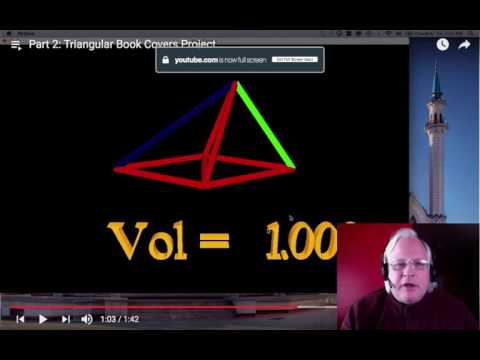

In [2]:
YouTubeVideo("WKrGmuXW-RQ")

In [3]:
import numpy as np
import pandas as pd

In [4]:
import math

In [5]:
root3 = math.sqrt(3)
S3 = math.sqrt(9/8)

In [6]:
2 * root3 # book cover tip to book cover tip

3.4641016151377544

In [7]:
theta_deg = np.arange(0, 181) # degrees


In [8]:
front_cover_tip = (-root3, 0.0)  # left
back_cover_tip  = ( root3, 0.0)  # right

In [9]:
page_tip_deg = lambda deg: (-root3 * np.cos(np.radians(deg)), root3 * (np.sin(np.radians(deg))))
page_tip_rad = lambda rad: (-root3 * np.cos(rad), root3 * np.sin(rad))

In [10]:
page_tip_rad(math.pi/2)

(-1.0605752387249068e-16, 1.7320508075688772)

In [11]:
dihedral_angle_of_reg_tet = math.acos(1/3)
math.degrees(dihedral_angle_of_reg_tet)

70.52877936550931

In [12]:
def distance(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

In [13]:
distance(front_cover_tip, back_cover_tip)

3.4641016151377544

In [14]:
distance(front_cover_tip, page_tip_deg(90))

2.449489742783178

In [15]:
distance(front_cover_tip, page_tip_deg(180))

3.4641016151377544

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/46149255411/in/photolist-2ncC3Xn-2mZypyZ-2dj3ZQP-2dj3ZPr-Sb76Cn-S6Quyu-S6QuFd" title="tetrabook2"><img src="https://live.staticflickr.com/4850/46149255411_31eb8869cf.jpg" width="500" height="341" alt="tetrabook2"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [16]:
import imp

In [17]:
import tetravolume
imp.reload(tetravolume)

<module 'tetravolume' from '/Users/mac/Documents/School_of_Tomorrow/tetravolume.py'>

In [18]:
import tetravolume as tv
from tetravolume import Tetrahedron

In [19]:
tv.D

1.0

In [20]:
test_tet = Tetrahedron(1,1,1,1,1,1)

In [21]:
test_tet.ivm_volume()

1.0

In [22]:
def get_volume_rad(theta):
    return Tetrahedron(1,1,1,1,1, distance(back_cover_tip, page_tip_rad(theta))/2).ivm_volume()

In [23]:
get_vol = np.vectorize(get_volume_rad)

In [24]:
table = pd.DataFrame({"theta_deg":theta_deg, "theta_rad":np.radians(theta_deg)})

In [25]:
table.head()

,theta_deg,theta_rad
0,0,0.000000
1,1,0.017453
2,2,0.034907
3,3,0.052360
4,4,0.069813


In [26]:
table["alt"] = table.theta_rad.apply(lambda r: root3 * math.sin(r))
table["tvs"] = table.theta_rad.apply(get_volume_rad)
table["x"]   = table.theta_rad.apply(lambda r: root3 * math.cos(r))

In [27]:
table

,theta_deg,theta_rad,alt,tvs,x
0,0,0.000000,0.000000e+00,4.214685e-08,1.732051
1,1,0.017453,3.022845e-02,1.851107e-02,1.731787
2,2,0.034907,6.044770e-02,3.701651e-02,1.730996
3,3,0.052360,9.064854e-02,5.551066e-02,1.729677
4,4,0.069813,1.208218e-01,7.398791e-02,1.727832
...,...,...,...,...,...
176,176,3.071779,1.208218e-01,7.398791e-02,-1.727832
177,177,3.089233,9.064854e-02,5.551066e-02,-1.729677
178,178,3.106686,6.044770e-02,3.701651e-02,-1.730996
179,179,3.124139,3.022845e-02,1.851107e-02,-1.731787


In [28]:
table = table.reindex(columns=["theta_deg", "theta_rad", "x", "alt", "tvs"])
table

,theta_deg,theta_rad,x,alt,tvs
0,0,0.000000,1.732051,0.000000e+00,4.214685e-08
1,1,0.017453,1.731787,3.022845e-02,1.851107e-02
2,2,0.034907,1.730996,6.044770e-02,3.701651e-02
3,3,0.052360,1.729677,9.064854e-02,5.551066e-02
4,4,0.069813,1.727832,1.208218e-01,7.398791e-02
...,...,...,...,...,...
176,176,3.071779,-1.727832,1.208218e-01,7.398791e-02
177,177,3.089233,-1.729677,9.064854e-02,5.551066e-02
178,178,3.106686,-1.730996,6.044770e-02,3.701651e-02
179,179,3.124139,-1.731787,3.022845e-02,1.851107e-02


In [29]:
pd.reset_option("display.precision", 5)
pd.set_option("display.float_format", "{:.3f}".format)
table.head()

,theta_deg,theta_rad,x,alt,tvs
0,0,0.000,1.732,0.000,0.000
1,1,0.017,1.732,0.030,0.019
2,2,0.035,1.731,0.060,0.037
3,3,0.052,1.730,0.091,0.056
4,4,0.070,1.728,0.121,0.074


In [30]:
table["cus"] = table.tvs.apply(lambda c: c/S3)
table.head()

,theta_deg,theta_rad,x,alt,tvs,cus
0,0,0.000,1.732,0.000,0.000,0.000
1,1,0.017,1.732,0.030,0.019,0.017
2,2,0.035,1.731,0.060,0.037,0.035
3,3,0.052,1.730,0.091,0.056,0.052
4,4,0.070,1.728,0.121,0.074,0.070


In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl

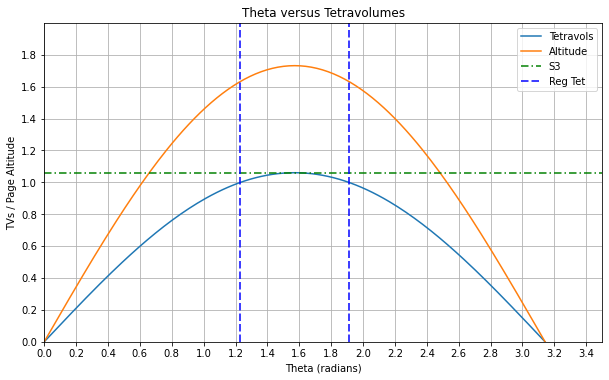

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.plot('theta_rad', 'tvs', data=table, label="Tetravols")
ax.plot('theta_rad', 'alt', data=table, label="Altitude")

# ax.set_box_aspect(1)
ax.set_aspect('equal')

ax.set_xlim(0,3.5)
ax.set_xticks(np.arange(0, 3.5, 0.2))
ax.set_xlabel("Theta (radians)")

ax.set_ylim(0,2.0)
ax.set_yticks(np.arange(0, 2.0, 0.2))
ax.set_ylabel("TVs / Page Altitude")
ax.set_title("Theta versus Tetravolumes")

ax.grid()

ax.axhline(1.06066, color='green', ls="-", dashes = (5, 2, 1, 2), label="S3")
ax.axvline(math.acos(1/3), color='blue', dashes = (5, 2), label="Reg Tet")
ax.axvline(math.acos(-1/3), color='blue', dashes = (5, 2))

ax.legend()

plt.show()

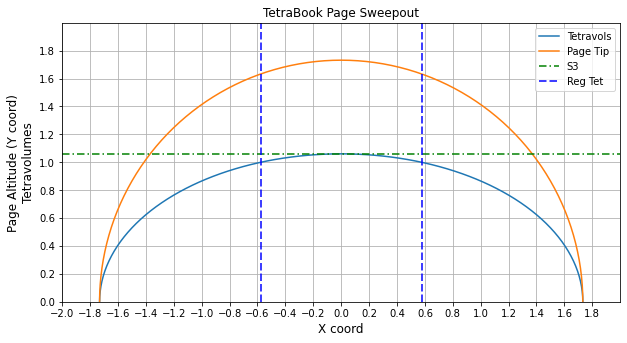

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.plot('x', 'tvs', data=table, label="Tetravols")
ax.plot('x', 'alt', data=table, label="Page Tip")

# ax.set_box_aspect(1)
ax.set_aspect('equal')

ax.set_xlim(-2,2)
ax.set_xticks(np.arange(-2, 2, 0.2))
ax.set_xlabel("X coord", fontsize=12)

ax.yaxis.set_label_position("left")
ax.set_ylabel("Page Altitude (Y coord)\nTetravolumes", fontsize=12)
ax.set_title("TetraBook Page Sweepout")

ax.set_ylim(0,2)
ax.set_yticks(np.arange(0, 2.0, 0.2))

ax.grid()

ax.axhline(1.06066, color='green', ls="-", dashes = (5, 2, 1, 2), label="S3")
ax.axvline(root3 * math.cos(math.acos( 1/3)), color='blue', dashes = (5, 2), label="Reg Tet")
ax.axvline(root3 * math.cos(math.acos(-1/3)), color='blue', dashes = (5, 2))

ax.legend()

plt.savefig("tetrabook_plot.png", format="png", bbox_inches="tight")
plt.show()

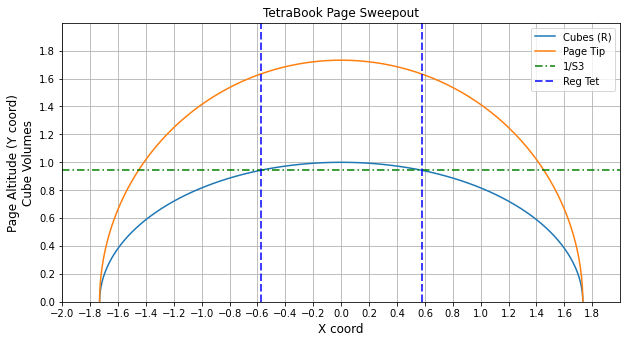

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.plot('x', 'cus', data=table, label="Cubes (R)")
ax.plot('x', 'alt', data=table, label="Page Tip")

# ax.set_box_aspect(1)
ax.set_aspect('equal')

ax.set_xlim(-2,2)
ax.set_xticks(np.arange(-2, 2, 0.2))
ax.set_xlabel("X coord", fontsize=12)

ax.yaxis.set_label_position("left")
ax.set_ylabel("Page Altitude (Y coord)\nCube Volumes", fontsize=12)
ax.set_title("TetraBook Page Sweepout")

ax.set_ylim(0,2)
ax.set_yticks(np.arange(0, 2.0, 0.2))

ax.grid()

ax.axhline(1/S3, color='green', ls="-", dashes = (5, 2, 1, 2), label="1/S3")
ax.axvline(root3 * math.cos(math.acos( 1/3)), color='blue', dashes = (5, 2), label="Reg Tet")
ax.axvline(root3 * math.cos(math.acos(-1/3)), color='blue', dashes = (5, 2))

ax.legend()

plt.savefig("tetrabook_cu_plot.png", format="png", bbox_inches="tight")
plt.show()